In [103]:
import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.metrics import f1_score

In [104]:
df = pd.read_csv('/content/earthquake_data_cleaned(final).csv')
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",Asia,Indonesia
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,Fiji,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",Oceania,Tonga
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,Fiji,Oceania,Fiji


In [105]:
alerts = df["alert"].unique()

In [106]:
features = ["magnitude", "depth", "cdi", "mmi", "sig"]
target = "alert"

df = df[features + [target]]

In [76]:
df.isna().sum()

,0
magnitude,0
depth,0
cdi,0
mmi,0
sig,0
alert,918


In [77]:
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 864 entries, 0 to 1324
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  864 non-null    float64
 1   depth      864 non-null    float64
 2   cdi        864 non-null    int64  
 3   mmi        864 non-null    int64  
 4   sig        864 non-null    int64  
 5   alert      864 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 47.2+ KB


In [78]:
df = df.astype({'cdi': 'int8', 'mmi': 'int8', 'sig': 'int8', 'depth': 'int16', 'alert': 'category'})

<class 'pandas.core.frame.DataFrame'>
Index: 864 entries, 0 to 1324
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   magnitude  864 non-null    float64 
 1   depth      864 non-null    int16   
 2   cdi        864 non-null    int8    
 3   mmi        864 non-null    int8    
 4   sig        864 non-null    int8    
 5   alert      864 non-null    category
dtypes: category(1), float64(1), int16(1), int8(3)
memory usage: 18.8 KB


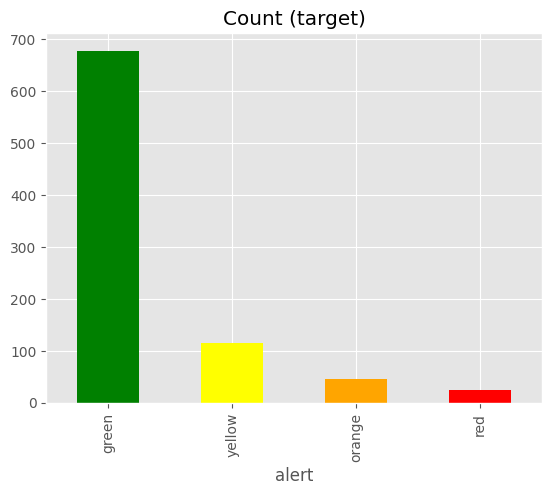

In [79]:
df[target].value_counts().plot(kind='bar', title='Count (target)', color=['green', 'yellow', 'orange', 'red']);

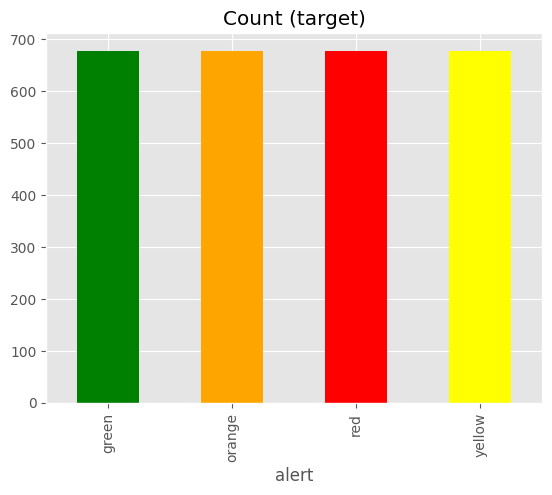

In [80]:
X = df[features]
y = df[target]

X = X.loc[:,~X.columns.duplicated()]


sm = SMOTE(random_state=42)
X_res, y_res= sm.fit_resample(X, y,)

y_res.value_counts().plot(kind='bar', title='Count (target)', color=['green', 'orange', 'red', 'yellow']);


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [82]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

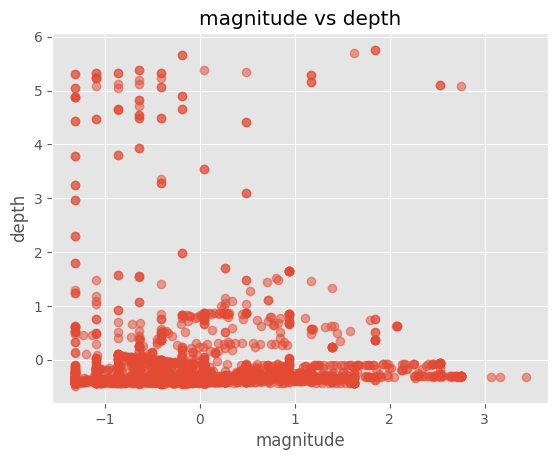

In [83]:
plt.plot(X_train[:, 0], X_train[:, 1], 'o', alpha=0.5)
plt.xlabel('magnitude')
plt.ylabel('depth')
plt.title('magnitude vs depth');
plt.show()

<Axes: >

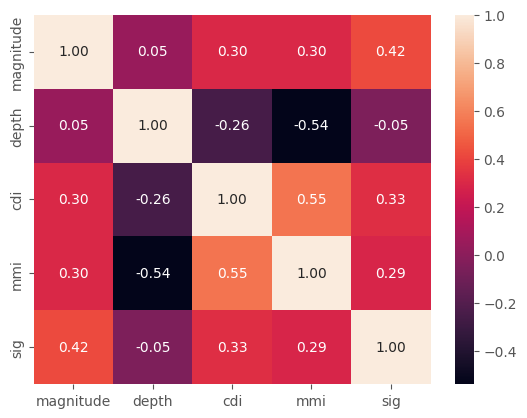

In [84]:
sns.heatmap(df.drop('alert', axis = 1).corr(), annot=True, fmt=".2f")

In [85]:
models = []

In [86]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
models.append(dt)

In [87]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
models.append(lr)

In [88]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
models.append(knn)

In [89]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
models.append(gnb)

In [90]:
nn = MLPClassifier(random_state=42)
nn.fit(X_train, y_train)
models.append(nn)

In [91]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
models.append(svm)

In [92]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
models.append(rf)

In [93]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
models.append(gb)

In [94]:
f1_scores = [f1_score(y_test, model.predict(X_test), average='weighted') for model in models]

In [95]:
f1_scores

[0.9797343395729181,
 0.6614608159735104,
 0.9150091722997741,
 0.6663620060040603,
 0.8931323198126805,
 0.8357941428950003,
 0.9815683640632321,
 0.9649466333668116]

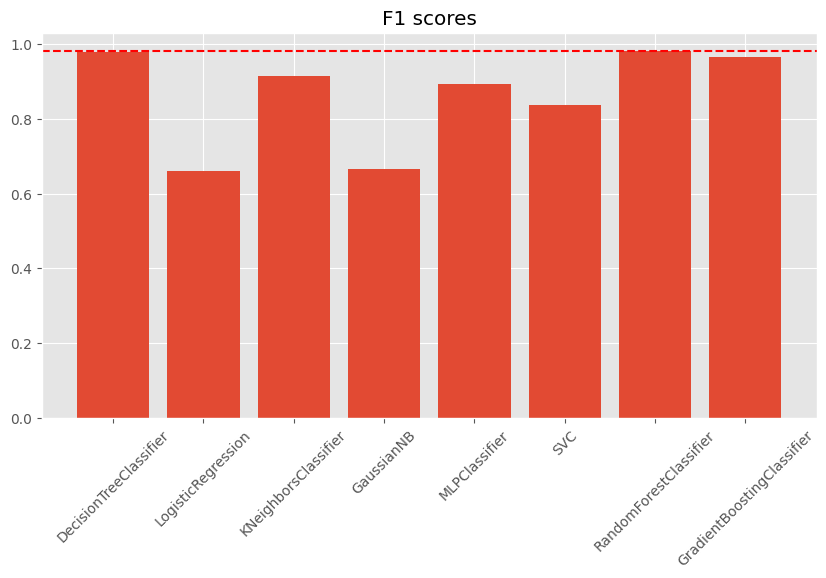

In [96]:
plt.figure(figsize=(10, 5))
plt.bar([type(model).__name__ for model in models], f1_scores)
plt.xticks(rotation=45)
plt.axhline(max(f1_scores), color='r', linestyle='--')
plt.title('F1 scores')
plt.show()

In [97]:
best_model = models[f1_scores.index(max(f1_scores))]
best_model

RandomForestClassifier(random_state=42)

In [98]:
y_pred = best_model.predict(X_test)

In [99]:
confusion_matrix(y_test, y_pred)

array([[129,   0,   0,   7],
       [  0, 134,   0,   0],
       [  0,   2, 128,   0],
       [  1,   0,   0, 142]])

In [100]:
# Use the original features list you defined earlier
features = ["magnitude", "depth", "cdi", "mmi", "sig", "depth"]
features = list(dict.fromkeys(features)) #remove duplicates
feature_importances = pd.DataFrame({'feature': features,
                                   'importance': best_model.feature_importances_})

print(feature_importances.sort_values(by='importance', ascending=False))

     feature  importance
4        sig    0.267094
3        mmi    0.227615
1      depth    0.193997
2        cdi    0.166802
0  magnitude    0.144492


In [101]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       green       0.99      0.95      0.97       136
      orange       0.99      1.00      0.99       134
         red       1.00      0.98      0.99       130
      yellow       0.95      0.99      0.97       143

    accuracy                           0.98       543
   macro avg       0.98      0.98      0.98       543
weighted avg       0.98      0.98      0.98       543



In [102]:
accuracy_score(y_test, y_pred)

0.9815837937384899

###The optimal model for classifying alerts is *RandomForestClassifier* with accuracy of 98%
